## Data Exploration and Regression Analysis 

The data is about agricultural inequality, industrial development and political instability in different countries. The targt variable that I set for part of the analysis is the demo-score, explained below.

Here are box-plots of the "rent" (% of farmers that rent all their land), "inst" (measure of political stability in the executive branch), "ecks" (number of violent internal war incidents ) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and the cutoff values for outliers. Further down are scatterplots comparing demo_score to the other variables.

In [1]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


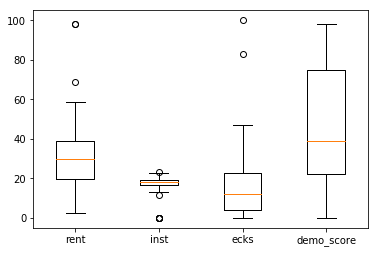

In [2]:
df = pd.read_csv('russett_full_v2.csv', )

#create the boxplots for the 4 variables
df = df[['rent', 'inst', 'ecks', 'demo_score']]
boxplots = plt.boxplot([df['rent'], df['inst'], df['ecks'], df['demo_score']]);
plt.xticks([1,2,3,4], ['rent', 'inst', 'ecks', 'demo_score']);

In [3]:
rentoutliers = boxplots['fliers'][0].get_ydata()
instoutliers = boxplots['fliers'][1].get_ydata()
ecksoutliers = boxplots['fliers'][2].get_ydata()

print ('The outliers for the rent variable are ' + str(rentoutliers))
print ('The outliers for the inst variable are ' + str(instoutliers))
print ('The outliers for the ecks variable are ' + str(ecksoutliers))
print ()
print ("We are defining outliers as points that do not fit into the box and whisker plot,\
 and thus are represented by dots beyond the whiskers. These are determnied by taking any\
 values that are greater than or less than the upper or lower quartile by 1.5 times the IQR.\
 These cutoffs are shown below.")

The outliers for the rent variable are [ 98.3  68.8  98. ]
The outliers for the inst variable are [  0.1  11.5   0.    0.1   0.1   0.1  23.5]
The outliers for the ecks variable are [ 100.   83.]

We are defining outliers as points that do not fit into the box and whisker plot, and thus are represented by dots beyond the whiskers. These are determnied by taking any values that are greater than or less than the upper or lower quartile by 1.5 times the IQR. These cutoffs are shown below.


In [4]:
def getOutlierCutoff(series):
    upper_quartile = series.quantile(.75)
    lower_quartile = series.quantile(.25)
    iqr = upper_quartile - lower_quartile
    upperCutoff = upper_quartile+1.5*iqr
    lowerCutoff = lower_quartile-1.5*iqr
    return [lowerCutoff,upperCutoff]

cutoff = df.apply(getOutlierCutoff)
cutoff

rent          [-9.075, 67.52499999999999]
inst                     [12.425, 23.425]
ecks                        [-24.5, 51.5]
demo_score               [-56.25, 153.75]
dtype: object

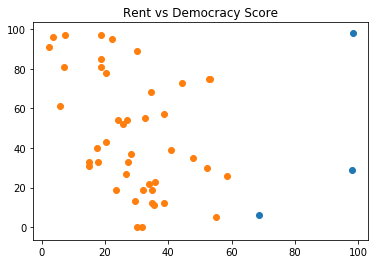

In [5]:
plt.scatter(df['rent'][df['rent'].isin(rentoutliers)], df['demo_score'][df['rent'].isin(rentoutliers)])
plt.scatter(df['rent'][~df['rent'].isin(rentoutliers)], df['demo_score'][~df['rent'].isin(rentoutliers)])
plt.title('Rent vs Democracy Score');

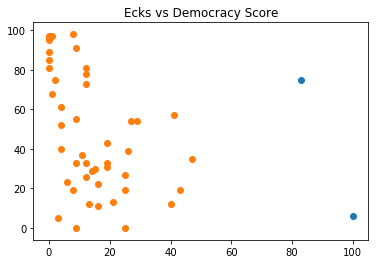

In [6]:
plt.scatter(df['ecks'][df['ecks'].isin(ecksoutliers)], df['demo_score'][df['ecks'].isin(ecksoutliers)])
plt.scatter(df['ecks'][~df['ecks'].isin(ecksoutliers)], df['demo_score'][~df['ecks'].isin(ecksoutliers)])
plt.title('Ecks vs Democracy Score');

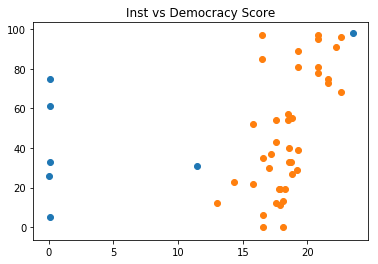

In [7]:
plt.scatter(df['inst'][df['inst'].isin(instoutliers)], df['demo_score'][df['inst'].isin(instoutliers)])
plt.scatter(df['inst'][~df['inst'].isin(instoutliers)], df['demo_score'][~df['inst'].isin(instoutliers)])
plt.title('Inst vs Democracy Score');

Fitting a multiple linear regression, using ordinary least squares, to this dataset with "demo_score" as the target variable using only the predictors 'rent','inst', and 'ecks'. The outcome of this model is compared to the outcome of a model using a robust regression with Huber loss and a regularization parameter alpha of 0.0 and all other parameters as default.

In [8]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

X = df[['rent', 'inst', 'ecks']]
y = df["demo_score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)

C:\Users\Gihani Dissanayake\Anaconda2\envs\py35\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
y_predtrain = lm.predict(X_train)

#the RMSE for the train data
MSE = mean_squared_error(y_train, y_predtrain)
inRMSE = sqrt(MSE)
print ('In sample RMSE is ' + str(inRMSE))

MSE = mean_squared_error(y_test, y_pred)
outRMSE = sqrt(MSE)
print ('Out of sample RMSE is ' + str(outRMSE))

print ('Our RMSE increases by ' + str(outRMSE-inRMSE))

In sample RMSE is 25.781460397
Out of sample RMSE is 32.580671803
Our RMSE increases by 6.79921140601


In [10]:
lm2 = linear_model.HuberRegressor(alpha=0)
model2 = lm2.fit(X_train, y_train)
y_pred2 = lm2.predict(X_test)
y_predtrain2 = lm2.predict(X_train)

y_test2 = y_test

#the RMSE for the train data
MSE2 = mean_squared_error(y_train, y_predtrain2)
inRMSE2 = sqrt(MSE2)
print ('In sample RMSE is ' + str(inRMSE2))

#the RMSE for test data
MSE2 = mean_squared_error(y_test, y_pred2)
outRMSE2 = sqrt(MSE2)
print ('Out of sample RMSE is ' + str(outRMSE2))

print ('Our RMSE increases by ' + str(outRMSE2-inRMSE2))

In sample RMSE is 26.8358817541
Out of sample RMSE is 29.1663802872
Our RMSE increases by 2.33049853305


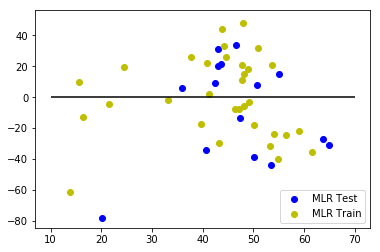

In [11]:
MLRresidualstest = y_pred - y_test
MLRresidualstrain =  y_predtrain - y_train

Hresidualstest = y_pred2 - y_test
Hresidualstrain =  y_predtrain2 - y_train

fig = plt.figure()
plt.scatter(y_pred, MLRresidualstest, c='b', marker="o", label='MLR Test')
plt.scatter(y_predtrain, MLRresidualstrain, c='y', marker="o", label='MLR Train')
#plt.scatter(y_predtrain, Hresidualstrain, c='y', marker="o", label='Huber Train')

plt.legend(loc='lower right')
plt.hlines(y=0, xmin=10, xmax = 70)
plt.show()

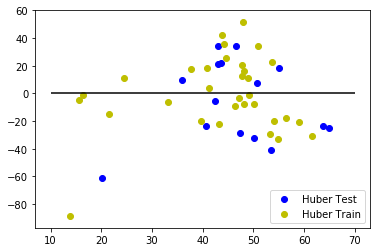

In [12]:
fig = plt.figure()

plt.scatter(y_pred, Hresidualstest, c='b', marker="o", label='Huber Test')
plt.scatter(y_predtrain, Hresidualstrain, c='y', marker="o", label='Huber Train')

plt.legend(loc='lower right')
plt.hlines(y=0, xmin=10, xmax = 70)
plt.show()

- Though OLS gives the lower in sample RMSE, the lower out of sample RMSE comes from the Huber regressor. The difference between the in and out of sample RMSE is lower for Huber because it better predicts in unknown data.  
- Outliers strongly affect OLS and skew the predicted values significantly, leading to a high test error. Conversely, Huber loss is more resistant.

## Principal Component Analysis

Same dataset but adding interaction variables

In [13]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Using StandardScaler to center and scale each feature:

In [14]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

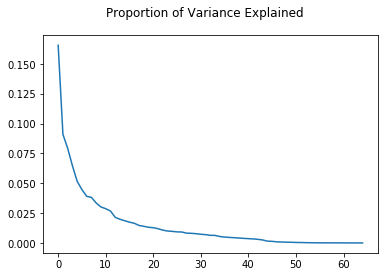

In [15]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(X)

ratios = pca.explained_variance_ratio_

fig1 = plt.figure()
fig1.suptitle('Proportion of Variance Explained', fontsize=12)
ax1 = fig1.add_subplot(111)
ax1.plot(range(0,len(ratios)), ratios);

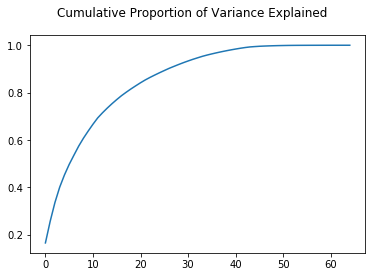

In [16]:
fig2 = plt.figure()
fig2.suptitle('Cumulative Proportion of Variance Explained', fontsize=12)
ax2 = fig2.add_subplot(111)
ax2.plot(range(0,len(ratios.cumsum())), ratios.cumsum());

Finding how many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%

In [17]:
PCAdata = np.column_stack((pca.explained_variance_ratio_,pca.explained_variance_ratio_.cumsum()))

df_PCA = pd.DataFrame(data = PCAdata, columns = ['variance','cumvariance'])

mask30 = df_PCA['cumvariance']>=.3
mask60 = df_PCA['cumvariance']>=.6
mask90 = df_PCA['cumvariance']>=.9

N1 = df_PCA[mask30].index[0]+1
N2 = df_PCA[mask60].index[0]+1
N3 = df_PCA[mask90].index[0]+1

print ('N1 = ' + str(N1))
print ('N2 = ' + str(N2))
print ('N3 = ' + str(N3))

N1 = 3
N2 = 9
N3 = 27


Fitting an ordinary least squares linear regression using N1, N2, and N3 number of principal components (also called principal components regression) and comparing the RMSEs

In [18]:
#N1------------------------------------------
#perform PCA
pca_N1 = decomposition.PCA(n_components = N1)
X_transformed_N1 = pca_N1.fit_transform(X)

#fit MLR on PCA
N1model = linear_model.LinearRegression()
N1model.fit(X_transformed_N1, y)
y_pred_N1 = N1model.predict(X_transformed_N1)
 
#get RMSE
MSE_N1 = mean_squared_error(y,y_pred_N1)

#N2------------------------------------------
#perform PCA
pca_N2 = decomposition.PCA(n_components = N2)
X_transformed_N2 = pca_N2.fit_transform(X)

#fit MLR on PCA
N2model = linear_model.LinearRegression()
N2model.fit(X_transformed_N2, y)
y_pred_N2 = N2model.predict(X_transformed_N2)

#get RMSE
MSE_N2 = mean_squared_error(y,y_pred_N2)

#N3------------------------------------------
#perform PCA
pca_N3 = decomposition.PCA(n_components = N3)
X_transformed_N3 = pca_N3.fit_transform(X)

#fit MLR on PCA
N3model = linear_model.LinearRegression()
N3model.fit(X_transformed_N3, y)
y_pred_N3 = N3model.predict(X_transformed_N3)

#get RMSE
MSE_N3 = mean_squared_error(y,y_pred_N3)

print ('RMSE for N1 = ' + str(sqrt(MSE_N1)))
print ('RMSE for N2 = ' + str(sqrt(MSE_N2)))
print ('RMSE for N3 = ' + str(sqrt(MSE_N3)))

RMSE for N1 = 71.5584065487
RMSE for N2 = 62.791613703
RMSE for N3 = 53.4548963987
